Source: https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C2%20-%20Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning%2C%20Regularization%20and%20Optimization/Notes/Readme.md

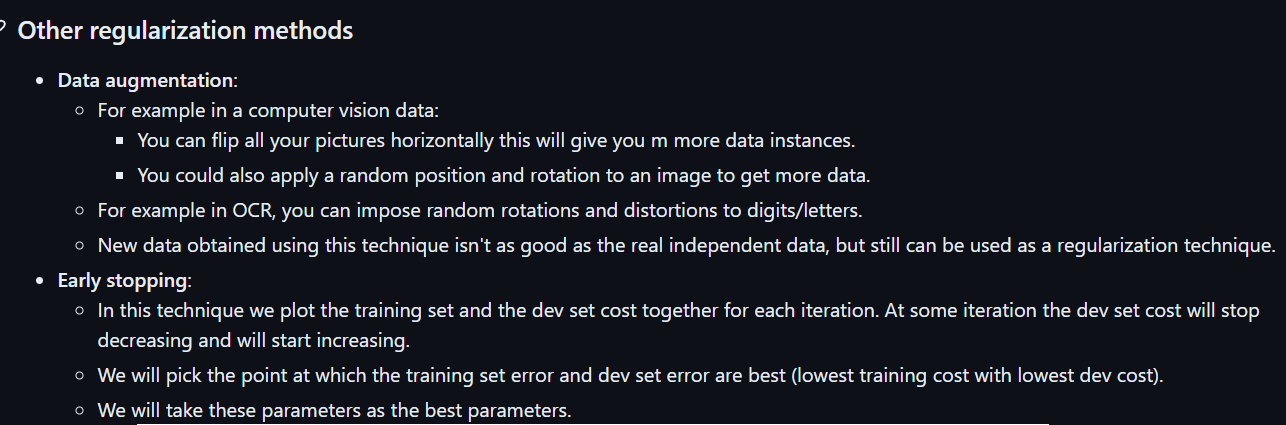

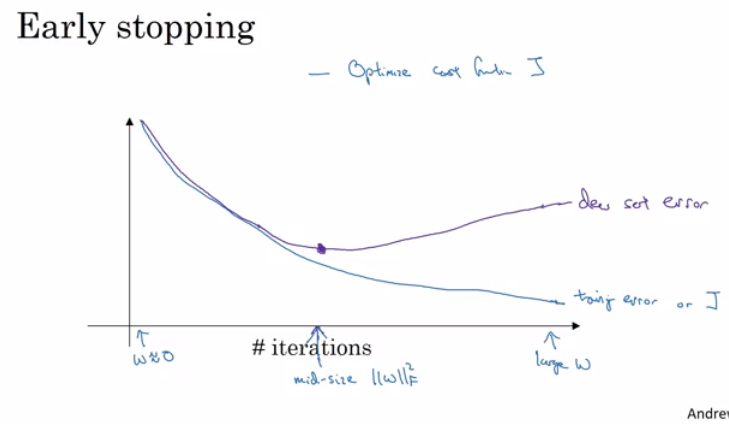

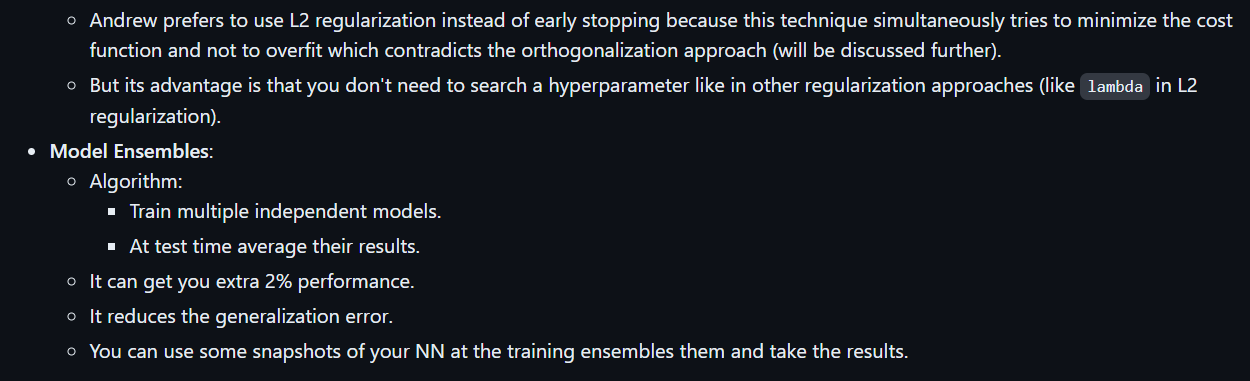

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

# Create data generator for training set
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train the model using augmented data
model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3971 - accuracy: 0.8751 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.0424 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1202 - accuracy: 0.9639 - val_loss: 0.0261 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0987 - accuracy: 0.9711 - val_loss: 0.0214 - val_accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0880 - accuracy: 0.9746 - val_loss: 0.0182 - val_accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0829 - accuracy: 0.9757 - val_loss: 0.0210 - val_accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 41s

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

# Create data generator for training set
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(train_generator, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4165 - accuracy: 0.8684 - val_loss: 0.0459 - val_accuracy: 0.9856
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1603 - accuracy: 0.9529 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1167 - accuracy: 0.9655 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.0253 - val_accuracy: 0.9918


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

# Define the base model architecture
def create_base_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the base model with snapshot ensembling
num_snapshots = 5
snapshot_models = []

for i in range(num_snapshots):
    model = create_base_model()

    # Define model checkpoint callback to save snapshot weights
    checkpoint_filepath = f'snapshot_model_{i}.h5'
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                          monitor='val_accuracy',
                                          save_best_only=True,
                                          mode='max',
                                          verbose=1)

    # Train the model with checkpoint callback
    model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpoint_callback])

    # Load the best model checkpoint
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    snapshot_models.append(best_model)

# Make predictions using snapshot ensemble
def ensemble_predictions(models, x_test):
    predictions = np.zeros((x_test.shape[0], 10))
    for model in models:
        predictions += model.predict(x_test)
    return predictions / len(models)

# Average predictions from snapshot ensemble
ensemble_preds = ensemble_predictions(snapshot_models, x_test)

# Evaluate ensemble predictions
ensemble_accuracy = np.mean(np.argmax(ensemble_preds, axis=1) == y_test)
print(f'Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%')

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.1501 - accuracy: 0.9556
Epoch 1: val_accuracy improved from -inf to 0.98250, saving model to snapshot_model_0.h5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1501 - accuracy: 0.9556 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 2/5
  11/1875 [..............................] - ETA: 20s - loss: 0.0734 - accuracy: 0.9744

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1874/1875 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9846
Epoch 2: val_accuracy did not improve from 0.98250
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0543 - val_accuracy: 0.9821
Epoch 3/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9903
Epoch 3: val_accuracy improved from 0.98250 to 0.98470, saving model to snapshot_model_0.h5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0463 - val_accuracy: 0.9847
Epoch 4/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9941
Epoch 4: val_accuracy improved from 0.98470 to 0.98560, saving model to snapshot_model_0.h5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0433 - val_accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0141 -

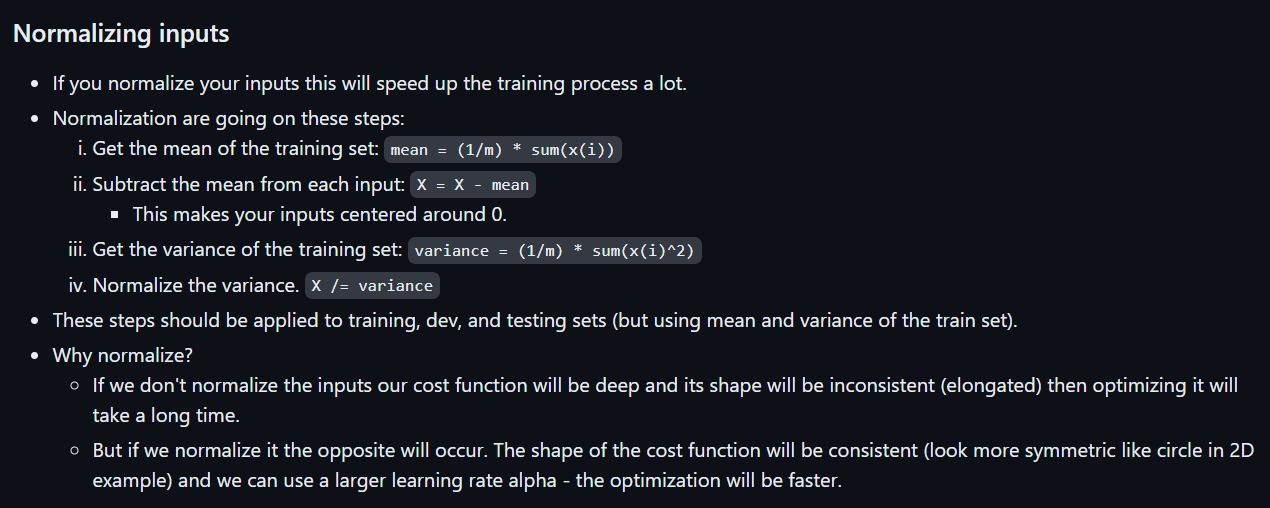

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Calculate mean and variance of the training set
train_mean = np.mean(x_train)
train_var = np.var(x_train)

# Normalize the training set
x_train_normalized = (x_train - train_mean) / np.sqrt(train_var)

# Normalize the testing set using training set statistics
x_test_normalized = (x_test - train_mean) / np.sqrt(train_var)

# Reshape data for CNN input (add channel dimension)
x_train_normalized = np.expand_dims(x_train_normalized, axis=-1)
x_test_normalized = np.expand_dims(x_test_normalized, axis=-1)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with normalized inputs
model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1076 - accuracy: 0.9679 - val_loss: 0.0510 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0404 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0272 - val_accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0343 -

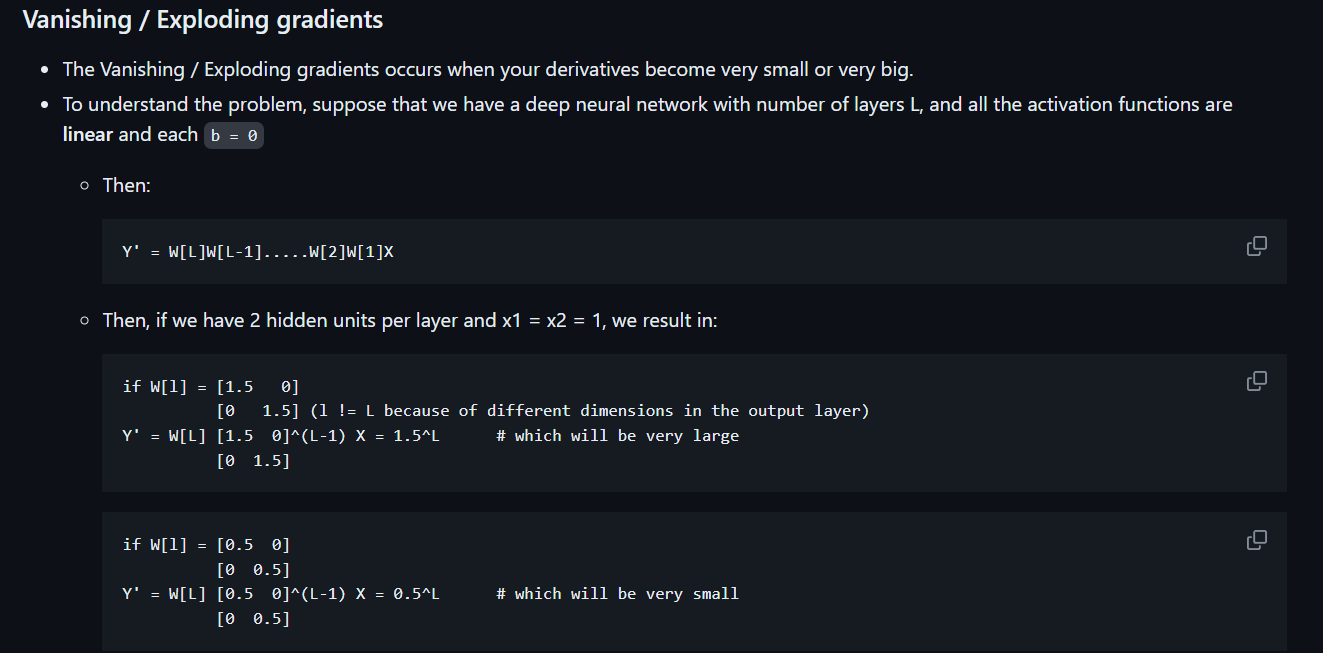

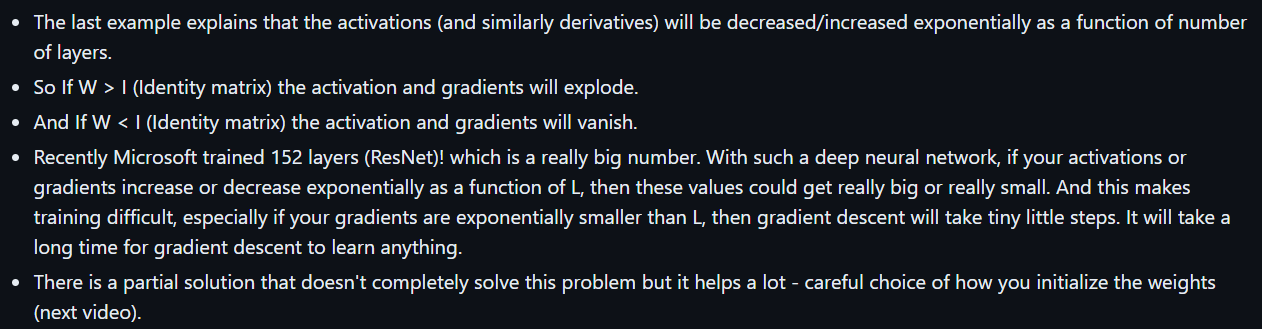

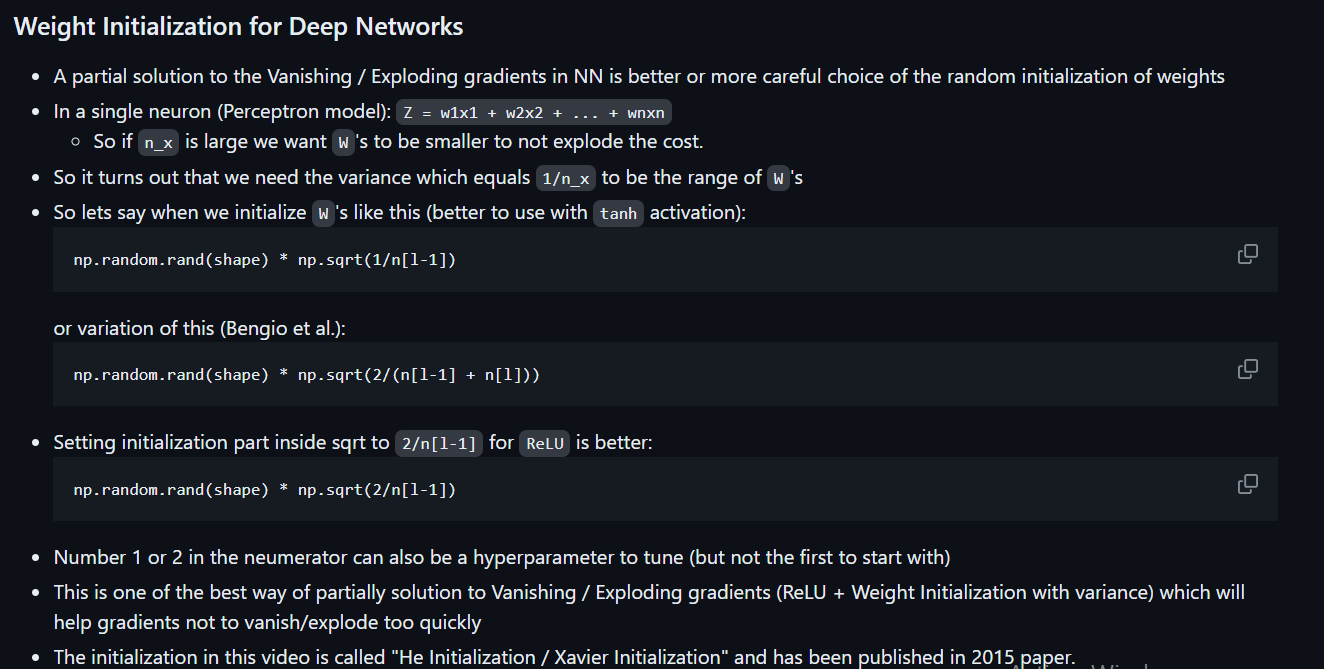

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Define the model with He initialization
initializer = HeNormal()

model = Sequential([
    Dense(256, activation='relu', kernel_initializer=initializer, input_shape=(784,)),
    Dense(128, activation='relu', kernel_initializer=initializer),
    Dense(10, activation='softmax', kernel_initializer=initializer)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2024 - accuracy: 0.9387 - val_loss: 0.1183 - val_accuracy: 0.9620
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0867 - accuracy: 0.9737 - val_loss: 0.0871 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0715 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0762 - val_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0784 - val_accuracy: 0.9777


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotNormal

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Define the model with Xavier initialization
initializer = GlorotNormal()

model = Sequential([
    Dense(256, activation='relu', kernel_initializer=initializer, input_shape=(784,)),
    Dense(128, activation='relu', kernel_initializer=initializer),
    Dense(10, activation='softmax', kernel_initializer=initializer)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2075 - accuracy: 0.9383 - val_loss: 0.1072 - val_accuracy: 0.9668
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863 - accuracy: 0.9733 - val_loss: 0.0886 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9811 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0762 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0838 - val_accuracy: 0.9766
